# Short Tank 4-Class Results Analysis - Hichem Lahiouel

In this notebook, I am analyzing the training results that have been done on 4 classes, namely e's, gammas, pions, and muons. 

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

In [4]:
############# define plotting params #############

c = plt.rcParams['axes.prop_cycle'].by_key()['color']
l = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', 'none', ' ', '']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2, "$\pi^0$":3}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$", 3:"$\pi^0$"}

In [8]:
############# define run locations #############

short_locs = [ '/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-27/17-02-44/outputs',
               '/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-02-01/10-10-25/outputs',
               '/home/hlahiouel/WatChMaL/outputs/2021-02-09/14-38-48/outputs',
               '/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-22/08-33-03/outputs',
               '/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-26/06-54-31/outputs',
               '/home/hlahiouel/WatChMaL/outputs/2021-02-04/12-47-05/outputs',
               '/home/hlahiouel/WatChMaL/outputs/2021-02-05/07-22-59/outputs',
               '/home/hlahiouel/WatChMaL/outputs/2021-02-07/20-01-02/outputs',
               '/home/hlahiouel/WatChMaL/outputs/2021-02-07/20-04-38/outputs'
             ]

short_titles = ['Short Tank: 2 Classes - Jan 27 - Full 20 epochs - Run 1',
                'Short Tank: 2 Classes - Feb 1 - Full 20 epochs - Run 2',
                'Short Tank: 2 Classes - Feb 9 - Full 20 epochs - Full dataset',
                'Short Tank: 3 Classes - Jan 22 - Full 20 epochs',
                'Short Tank: 3 Classes - Jan 26 - Full 20 epochs',
                'Short Tank: 4 Classes - Feb 2 - Full 20 epochs',
                'Short Tank: 4 Classes - Feb 5 - Full 20 epochs',
                'Short Tank: 4 Classes - Feb 7 - Full 20 epochs - Run 1',
                'Short Tank: 4 Classes - Feb 7 - Full 20 epochs - Run 2'
               ]


short_linecolor = [c[0],c[0],c[0],c[1],c[1],c[2],c[2],c[2],c[2]]

short_linestyle = [l[0],l[0],l[0],l[1],l[1],l[2],l[2],l[2],l[2]]

i:  0
Found training logs:  ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-27/17-02-44/outputs/log_train_0.csv']
i:  1
Found training logs:  ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-02-01/10-10-25/outputs/log_train_0.csv']
i:  2
Found training logs:  ['/home/hlahiouel/WatChMaL/outputs/2021-02-09/14-38-48/outputs/log_train_0.csv']
i:  3
Found training logs:  ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-22/08-33-03/outputs/log_train_0.csv']
i:  4
Found training logs:  ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-26/06-54-31/outputs/log_train_0.csv']
i:  5
Found training logs:  ['/home/hlahiouel/WatChMaL/outputs/2021-02-04/12-47-05/outputs/log_train_0.csv']
i:  6
Found training logs:  ['/home/hlahiouel/WatChMaL/outputs/2021-02-05/07-22-59/outputs/log_train_0.csv']
i:  7
Found training logs:  ['/home/hlahiouel/WatChMaL/outputs/2021-02-07/20-01-02/outputs/log_train_0.csv']
i:  8
Found training logs:  ['/home/hlahiouel/WatChMaL/o

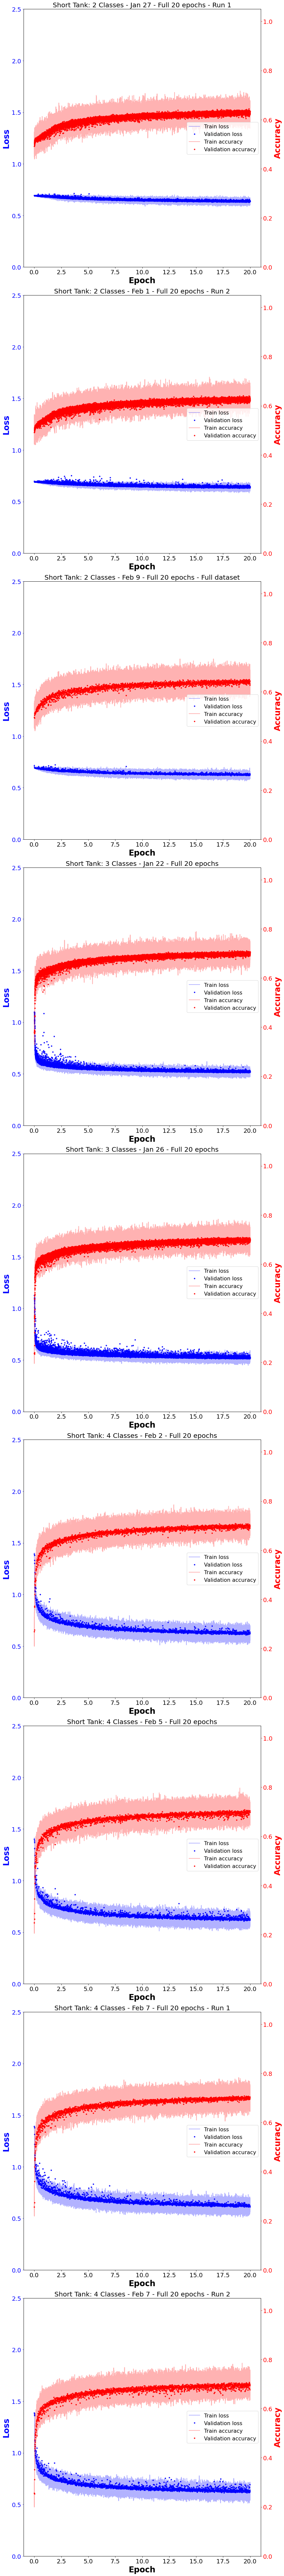

In [9]:
fig = multi_disp_learn_hist(short_locs,losslim=2.5,titles=short_titles,leg_font=15, title_font=15,xmax=20)

In [10]:
############# load short tank run data #############

short_raw_output_softmax    = [np.load(loc + "/softmax.npy") for loc in short_locs]
short_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in short_locs]

In [11]:
############# compute short tank multi e/gamma ROC #############

short_fprs, short_tprs, short_thrs = multi_compute_roc(short_raw_output_softmax, short_raw_actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

In [12]:
############# combine short and long results #############

fprs =  short_fprs 
tprs = short_tprs 
thrs = short_thrs

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


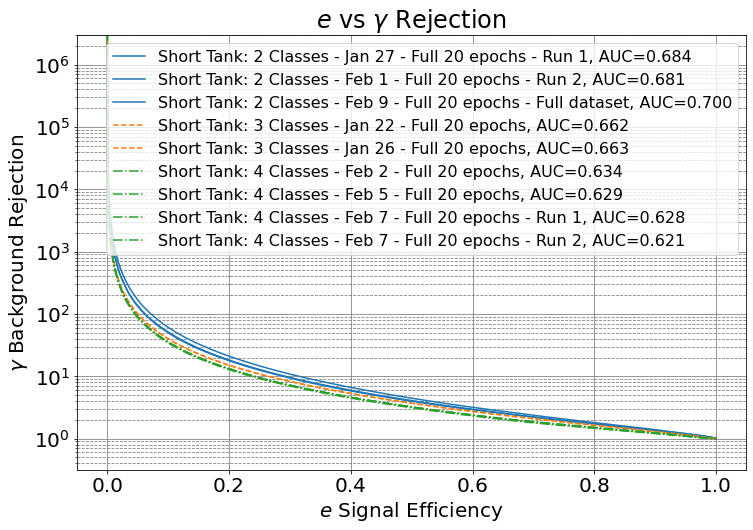

In [13]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=short_linestyle,linecolors=short_linecolor, 
                      plot_labels=short_titles, show=False)

In [16]:
############# compute short multi e/mu ROC #############

short_fprs, short_tprs, short_thrs = multi_compute_roc(short_raw_output_softmax, short_raw_actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:805: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


In [17]:
############# combine short and long results #############

fprs =  short_fprs
tprs = short_tprs
thrs = short_thrs

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]


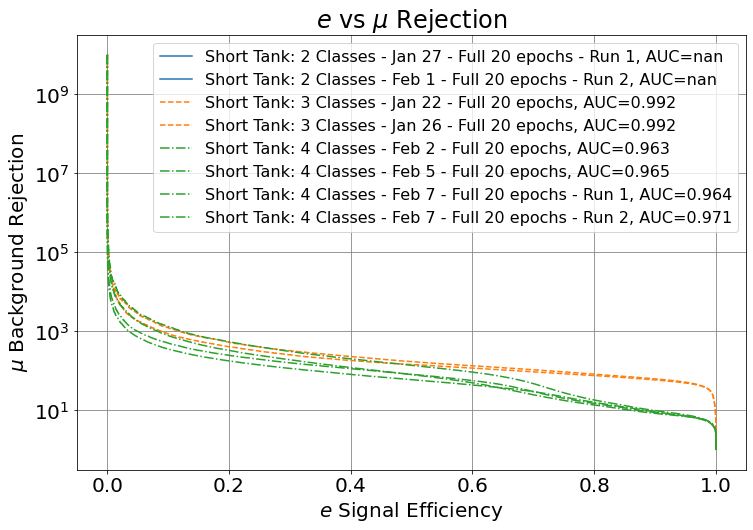

In [18]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\mu$", fig_list=[1], 
                      linestyles=short_linestyle,linecolors=short_linecolor, plot_labels=short_titles,show=False)

In [23]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

In [24]:
############# compute short collapsed ROC #############

short_collapsed_class_scores_list, short_collapsed_class_labels_list = multi_collapse_test_output(short_raw_output_softmax, short_raw_actual_labels, label_dict, ignore_type='$\gamma$')

short_collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in short_collapsed_class_labels_list]
short_collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in short_collapsed_class_scores_list]

In [25]:
short_fpr_list, short_tpr_list, short_thr_list = multi_compute_roc(short_collapsed_class_scores_list, short_collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["non-mu"], 
                            false_label=muon_softmax_index_dict["mu"])

In [26]:
############# short results #############

fpr_list = short_fpr_list
tpr_list = short_tpr_list
thr_list = short_thr_list

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a 

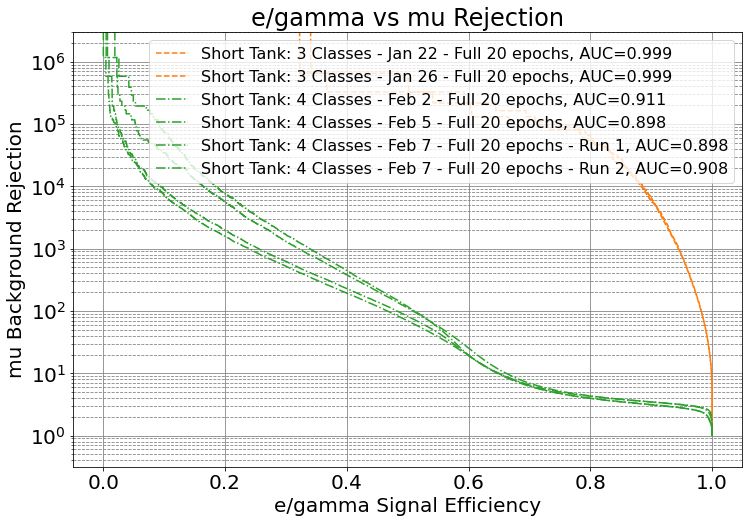

In [27]:
figs = multi_plot_roc(fpr_list, tpr_list, thr_list,"e/gamma", "mu", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=short_linestyle,linecolors=short_linecolor, plot_labels=short_titles, show=False)